In [1]:
# 라이브러리 추가
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 꼬꼬마 형태소 분석기
from konlpy.tag import Kkma
kkma = Kkma()

In [3]:
# '깃대종'이 언급된 카카오 블로그, 카페 글
df = pd.read_excel('D:/GEODATA/kakao_blog_cafe.xlsx', sheet_name='Sheet1').drop(['Unnamed: 0'], axis=1)
df[['title']].to_csv('D:/GEODATA/kakao_blog_cafe.txt', index=False, header=False)
f = open("D:/GEODATA/kakao_blog_cafe.txt", 'r', encoding='UTF-8')
lines = f.readlines()
f.close()

In [4]:
# 단어 2차원 리스트
dataset = []
for i in range(len(lines)):
    dataset.append(kkma.nouns(lines[i]))
dataset = [[y for y in x if not len(y)==1] for x in dataset]   # 2자 이상 
dataset = [[y for y in x if not y.isdigit()] for x in dataset] # 숫자판별
dataset[:10]

[['국립공원', '깃대', '깃대종뱃지', '21종', '모두', '획득'],
 ['호반새', '육추', '계룡', '계룡산', '깃대', '깃대종'],
 ['국립공원', '깃대', '깃대종', '식물'],
 ['깃대', '깃대종', '국립', '국립공원', '공원', '그린', '그린포인트', '포인트'],
 ['국립공원', '깃대', '깃대종뱃지', '18종'],
 ['한라산', '한라산국립공원', '국립공원', '대표', '생물', '깃대', '깃대종', '선정'],
 ['생태계', '보고', '깃대', '깃대종', '서식지'],
 ['내장산', '깃대', '깃대종', '진노랑', '진노랑상사화', '상사화'],
 ['깃대', '깃대종'],
 ['카카오', '검색', '이용', '깃대', '깃대종', '로그', '카페', '가시화']]

In [5]:
# Word2Vec 불러오기
from gensim.models.word2vec import Word2Vec

In [6]:
# 모형 구축
model = Word2Vec(dataset,
                 sg=1,           # Skip-gram 적용: 중심 단어로 주변 단어를 예측
                 window=5,       # 중심 단어로부터 좌우 5개 단어까지 학습에 적용
                 min_count=1     # 전체문서에서 최소 1회 이상 출현단어로 학습 진행
                )
model.init_sims(replace=True)

c:\users\bhyu\appdata\local\programs\python\python35\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [7]:
# 단어간 유사도
print("깃대종과 국립공원 단어간 유사도는 %.2f 입니다." % (model.wv.similarity('깃대종', '국립공원')))

깃대종과 국립공원 단어간 유사도는 0.99 입니다.


In [8]:
# 가장 유사한 단어 100개
df = pd.DataFrame(model.wv.most_similar("깃대종", topn=100), columns=['단어', '유사도'])
df.head(10)

,단어,유사도
0,국립공원,0.992585
1,깃대,0.992438
2,생태,0.991935
3,산행,0.991719
4,여행,0.991663
5,자연,0.991139
6,공원,0.991078
7,계곡,0.991048
8,나무,0.990980
9,코스,0.990886


In [9]:
kw_list = ['가야산', '경주', '계룡산', '내장산', '다도해해상',
           '덕유산', '무등산', '변산반도', '북한산', '설악산',
           '소백산', '속리산', '오대산', '월악산', '월출산',
           '주왕산', '지리산', '치악산', '태백산', '태안해안',
           '한라산', '한려해상']
df = df[df['단어'].isin(kw_list)]
df

,단어,유사도
11,지리산,0.990059
14,주왕산,0.989789
23,오대산,0.988366
24,북한산,0.988302
33,무등산,0.985617
36,치악산,0.984983
46,내장산,0.983047
47,소백산,0.982857
51,가야산,0.981762
60,덕유산,0.980565


In [10]:
# 가장 유사한 단어 100개
df1 = pd.DataFrame(model.wv.most_similar(df.iloc[0]['단어'], topn=100), columns=['단어', df.iloc[0]['단어']])
df2 = pd.DataFrame(model.wv.most_similar(df.iloc[1]['단어'], topn=100), columns=['단어', df.iloc[1]['단어']])
df3 = pd.DataFrame(model.wv.most_similar(df.iloc[2]['단어'], topn=100), columns=['단어', df.iloc[2]['단어']])
df4 = pd.DataFrame(model.wv.most_similar(df.iloc[3]['단어'], topn=100), columns=['단어', df.iloc[3]['단어']])
df5 = pd.DataFrame(model.wv.most_similar(df.iloc[4]['단어'], topn=100), columns=['단어', df.iloc[4]['단어']])
dfs = [df.set_index(['단어']) for df in [df1, df2, df3, df4, df5]]
df5 = pd.concat(dfs, join='inner', axis=1).reset_index()
df5.head(10)

,단어,지리산,주왕산,오대산,북한산,무등산
0,산행,0.993371,0.991652,0.993379,0.989478,0.990786
1,안내,0.992279,0.989850,0.990963,0.990785,0.984577
2,자연,0.991686,0.990178,0.992029,0.989620,0.987261
3,생태,0.991578,0.991713,0.991425,0.989564,0.990859
4,국립공원,0.991563,0.990256,0.991777,0.990065,0.990014
5,여행,0.991324,0.991155,0.990788,0.987760,0.987495
6,대전,0.991318,0.990381,0.988500,0.987981,0.988239
7,공원,0.991224,0.991438,0.990089,0.987834,0.986611
8,계곡,0.991077,0.990552,0.991274,0.988901,0.988866
9,정기,0.990900,0.988718,0.992161,0.988860,0.985771


In [11]:
# 단어 평균 컬럼 추가
df5['전체'] = df5.mean(numeric_only=True, axis=1)
df = df5.sort_values(by='전체', ascending=False); df = df[:30]
df.head(10)

,단어,지리산,주왕산,오대산,북한산,무등산,전체
0,산행,0.993371,0.991652,0.993379,0.989478,0.990786,0.991733
3,생태,0.991578,0.991713,0.991425,0.989564,0.990859,0.991028
4,국립공원,0.991563,0.990256,0.991777,0.990065,0.990014,0.990735
2,자연,0.991686,0.990178,0.992029,0.989620,0.987261,0.990155
8,계곡,0.991077,0.990552,0.991274,0.988901,0.988866,0.990134
5,여행,0.991324,0.991155,0.990788,0.987760,0.987495,0.989704
1,안내,0.992279,0.989850,0.990963,0.990785,0.984577,0.989691
7,공원,0.991224,0.991438,0.990089,0.987834,0.986611,0.989439
6,대전,0.991318,0.990381,0.988500,0.987981,0.988239,0.989284
9,정기,0.990900,0.988718,0.992161,0.988860,0.985771,0.989282


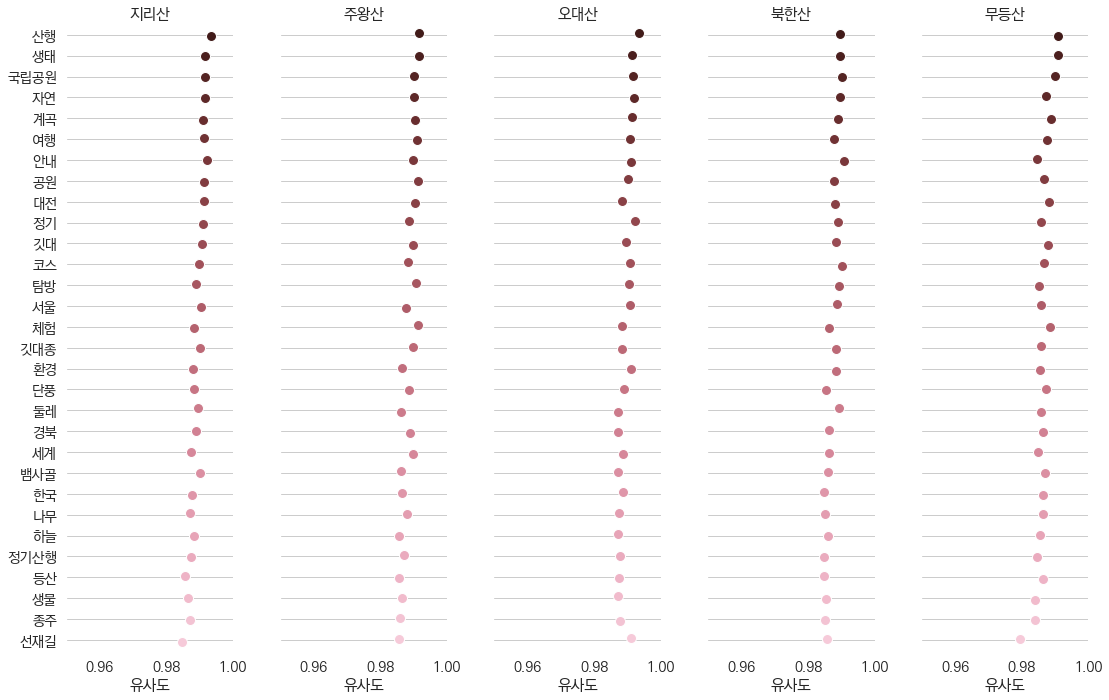

In [12]:
# 플롯 설정
sns.set(style='whitegrid', font='KoPubDotum', font_scale=1.3)
g = sns.PairGrid(df.sort_values("전체", ascending=False), x_vars=df.columns[1:6], y_vars=["단어"])
g.fig.set_size_inches(16,16)

# 스트립플롯 함수를 이용한 닷 플롯
g.map(sns.stripplot,
      size=10,
      orient="h",
      palette="ch:s=1,r=-.1,h=1_r",
      linewidth=1,
      edgecolor="w")
g.set(xlim=(0.95, 1), xlabel="유사도", ylabel="")
titles = df.columns[1:6]

for ax, title in zip(g.axes.flat, titles):
    ax.set(title=title)                        # 축 제목 설정
    ax.xaxis.grid(False); ax.yaxis.grid(True) # 수평 격자 설정

sns.despine(left=True, bottom=True)
plt.savefig('D:/GEODATA/IMG01.png', bbox_inches='tight')